In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, mean_squared_error, mean_absolute_error

from prophet import Prophet

/home/dhyan/StockHack2025/sh25/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df = pd.read_csv("data/raw/CVNA.csv")

In [5]:
data = df[["timestamp","close"]]

In [6]:
data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.tz_localize(None)
data.columns = ["ds","y"]

/tmp/ipykernel_118996/387708580.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.tz_localize(None)


04:59:32 - cmdstanpy - INFO - Chain [1] start processing
04:59:32 - cmdstanpy - INFO - Chain [1] done processing


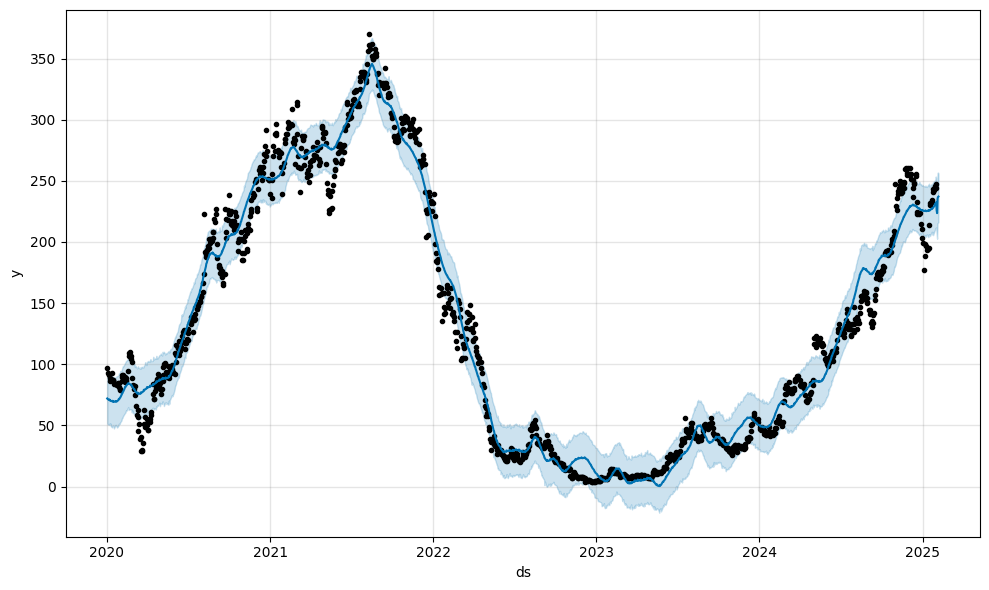

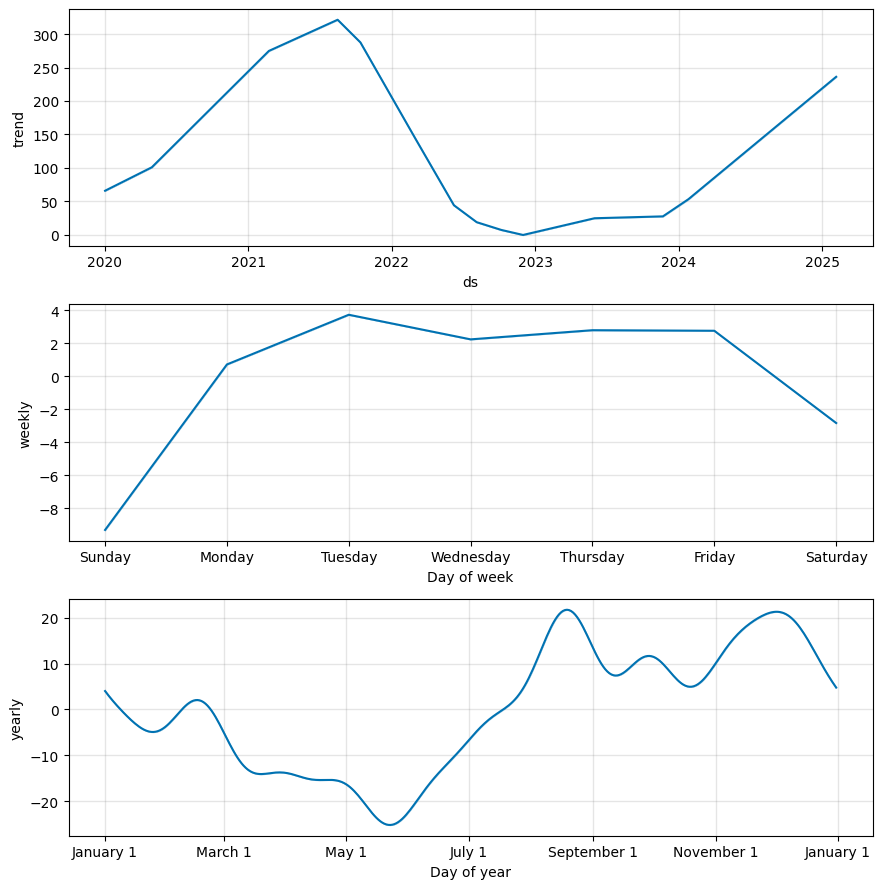

In [9]:
m = Prophet()
m.fit(data)
future = m.make_future_dataframe(periods=5)
forecast = m.predict(future)
fig1 = m.plot(forecast)
plt.savefig("prophet_CVNA.png")

plt.show()
fig2 = m.plot_components(forecast)
plt.savefig("prophet_CVNA_components.png")

plt.show()


In [10]:
# give MAE, RMSE and MAPE
def forecast_accuracy(forecast, actual):
    mae = mean_absolute_error(actual, forecast)
    rmse = np.sqrt(mean_squared_error(actual, forecast))
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))
    return({'mae': mae, 'rmse': rmse, 'mape': mape})

forecast_accuracy(forecast.yhat[:len(data)], data.y)


{'mae': 12.344571407843063,
 'rmse': 15.908850582062275,
 'mape': 0.229084858747829}

In [18]:
tickers = ["CVNA","CELH","ALT","FUBO","UPST"]

perfomance = pd.DataFrame(columns=["ticker","mae","rmse","mape"])
for tick in tickers:
    df = pd.read_csv(f"data/raw/{tick}.csv")
    data = df[["timestamp","close"]]
    data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.tz_localize(None)
    data.columns = ["ds","y"]
    m = Prophet()
    m.fit(data)
    future = m.make_future_dataframe(periods=5)
    forecast = m.predict(future)
    mae, rmse, mape = forecast_accuracy(forecast.yhat[:len(data)], data.y).values()
    perfomance = pd.concat([perfomance,pd.DataFrame({"ticker":tick,"mae":mae,"rmse":rmse,"mape":mape}, index=[tick])], ignore_index=True)
    

perfomance.to_csv("prophet_perfomance.csv", index=False)
print(perfomance)

/tmp/ipykernel_118996/3856212498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.tz_localize(None)
05:10:04 - cmdstanpy - INFO - Chain [1] start processing
05:10:04 - cmdstanpy - INFO - Chain [1] done processing
/tmp/ipykernel_118996/3856212498.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.tz_localize(None)
05:10:05 - cmdstanpy - INFO - Chain [1] start processing
05:10:05 - cmdstanpy -

  ticker        mae       rmse      mape
0   CVNA  12.344571  15.908851  0.229085
1   CELH  13.135487  17.039943  0.321831
2    ALT   2.322878   2.985438  0.327190
3   FUBO   2.011911   3.228631  0.443502
4   UPST  16.603226  24.167264  0.304372
